In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv("api_config.env")

True

### Evaluating the Cryptocurrency Wallet

In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

# The monthly amount for the member's household income
monthly_income = 12000

# Free Crypto API Call
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [4]:
# Current price of BTC
btc_response = requests.get(btc_url).json()
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 19219406,
            "id": 1,
            "last_updated": 1669680562,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 311733012830,
                    "percent_change_1h": 0.0281669128469088,
                    "percent_change_24h": -1.37867315937269,
                    "percent_change_7d": 2.59066997841048,
                    "percentage_change_1h": 0.0281669128469088,
                    "percentage_change_24h": -1.37867315937269,
                    "percentage_change_7d": 2.59066997841048,
                    "price": 16224.03,
                    "volume_24h": 24529300676
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19219406,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurren

In [5]:
# Current price of BTC
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]
btc_price

16224.03

In [6]:
# API call to access the current price ETH
eth_response = requests.get(eth_url).json()
print(json.dumps(eth_response, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 120519280,
            "id": 1027,
            "last_updated": 1669680561,
            "max_supply": 120519280,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 140920608396,
                    "percent_change_1h": -0.105087249131806,
                    "percent_change_24h": -2.27703199292325,
                    "percent_change_7d": 5.31427071379048,
                    "percentage_change_1h": -0.105087249131806,
                    "percentage_change_24h": -2.27703199292325,
                    "percentage_change_7d": 5.31427071379048,
                    "price": 1169.29,
                    "volume_24h": 6334202538
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120519280,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cry

In [7]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH
eth_price

1169.29

In [8]:
# Calculating values
btc_value = btc_coins * btc_price
eth_value = eth_coins * eth_price
total_crypto_wallet = btc_value + eth_value

print(f"The current value of the {btc_coins} BTC is ${btc_value: 0.2f}")
print(f"The current value of the {eth_coins} ETH is ${eth_value: 0.2f}")
print(f"The current value of my crypto wallet is ${total_crypto_wallet: 0.2f}")

The current value of the 1.2 BTC is $ 19468.84
The current value of the 5.3 ETH is $ 6197.24
The current value of my crypto wallet is $ 25666.07


### Evaluating Stock and Bond Holdings with Alpaca

In [9]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


In [10]:
# Alpaca setup
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [11]:
# Bnd and stock for portfolio
tickers = ["AGG", "SPY"]
timeframe = "1D"

# Format
start_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

In [12]:
# Alpaca get_barset to get current closing prices
portfolio_prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

portfolio_prices_df.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-08-07 04:00:00+00:00,119.66,119.73,119.395,119.43,5559066,15246,119.475306,AGG
2020-08-07 04:00:00+00:00,333.28,334.88,332.300,334.57,57282821,350100,333.800372,SPY


In [13]:
# Closing prices
agg_close_price = float(portfolio_prices_df[portfolio_prices_df['symbol']=='AGG']['close'][0])
spy_close_price = float(portfolio_prices_df[portfolio_prices_df['symbol']=='SPY']['close'][0])

print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")


Current AGG closing price: $119.43
Current SPY closing price: $334.57


In [14]:
# Current values
agg_value = agg_shares * agg_close_price
spy_value = spy_shares * spy_close_price
total_stocks_bonds = spy_value + agg_value
total_portfolio = total_crypto_wallet + total_stocks_bonds

print(f"The current value of the {agg_shares} AGG shares is ${agg_value: 0.2f}")
print(f"The current value of the {spy_shares} SPY shares is ${spy_value: 0.2f}")
print(f"The current value of the stock and bond portion of the portfolio is ${total_stocks_bonds: 0.2f}")
print(f"The total value of the current savings portfolio is ${total_portfolio: 0.2f}")

The current value of the 200 AGG shares is $ 23886.00
The current value of the 110 SPY shares is $ 36802.70
The current value of the stock and bond portion of the portfolio is $ 60688.70
The total value of the current savings portfolio is $ 86354.77


### Evaluating Emergency Fund

In [15]:
# Dataframe
savings_data = [
    total_crypto_wallet,
    total_stocks_bonds,
]

savings_df = pd.DataFrame(
    savings_data, 
    columns=["amount"], 
    index=["crypto", "stock/bond"]
)

display(savings_df)

,amount
crypto,25666.073
stock/bond,60688.700


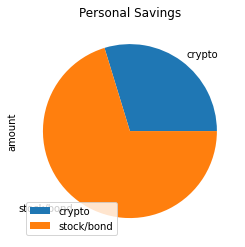

In [16]:
# View portfolio
savings_df.plot.pie(y="amount", title="Personal Savings")

In [17]:
# Emergency fund
emergency_fund_value = monthly_income * 3

# Check emergency fund
if total_portfolio > emergency_fund_value:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_portfolio == emergency_fund_value:
    print("Great, You have saved three times your monthly expenses! Keep reaching toward this important financial goal.")
else:
    print(f"You are ${(emergency_fund_value - total_portfolio):0.2f} away from your emergency fund goal," 
          f"continue saving between 10% and 20% of your monthly income to reach your goal.")

Congratulations! You have enough money in your emergency fund.


### Creating Financial Planner for Retirement

In [18]:
start_date = pd.Timestamp('2017-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

limit_rows = 1000

In [19]:
alpaca_bars_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=limit_rows
).df
alpaca_bars_df.index = alpaca_bars_df.index.date
display(alpaca_bars_df)

,open,high,low,close,volume,trade_count,vwap,symbol
2017-08-07,109.69,109.72,109.6066,109.685,2359826,7755,109.674876,AGG
2017-08-08,109.67,109.69,109.5000,109.580,2570876,12663,109.577636,AGG
2017-08-09,109.87,109.87,109.6600,109.670,2308932,11031,109.771749,AGG
2017-08-10,109.70,109.85,109.6700,109.800,2004163,12437,109.776611,AGG
2017-08-11,109.75,109.94,109.6800,109.870,1913253,10113,109.860974,AGG
...,...,...,...,...,...,...,...,...
2018-07-18,280.56,281.18,280.0600,281.060,45335061,169756,280.805105,SPY
2018-07-19,280.31,280.74,279.4600,279.960,61491867,236049,280.146764,SPY
2018-07-20,279.77,280.48,279.5000,279.720,83383795,235636,279.865410,SPY
2018-07-23,279.45,280.43,279.0600,280.240,47047565,190987,279.912183,SPY


In [20]:
agg_df = alpaca_bars_df[alpaca_bars_df['symbol']=='AGG'].drop('symbol', axis=1)
spy_df = alpaca_bars_df[alpaca_bars_df['symbol']=='SPY'].drop('symbol', axis=1)
portfolio_prices_ten_df = pd.concat([agg_df,spy_df],axis=1, keys=['AGG','SPY'])

In [36]:
# Configuring the Monte Carlo simulation
MC_thirty_year = MCSimulation(
    portfolio_data = portfolio_prices_ten_df,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

MC_thirty_year.portfolio_data.tail()

AGG                                                  \
              open    high       low   close    volume trade_count   
2020-08-03  119.37  119.40  119.1903  119.40  13014535       36359   
2020-08-04  119.42  119.63  119.4200  119.63  10935154       39113   
2020-08-05  119.39  119.49  119.3100  119.40  17377874       42313   
2020-08-06  119.62  119.73  119.5300  119.57   4608710       15938   
2020-08-07  119.66  119.73  119.3950  119.43   5559066       15246   

                                     SPY                                    \
                  vwap daily_return open high low close volume trade_count   
2020-08-03  119.282420    -0.001338  NaN  NaN NaN   NaN    NaN         NaN   
2020-08-04  119.541666     0.001926  NaN  NaN NaN   NaN    NaN         NaN   
2020-08-05  119.387245    -0.001923  NaN  NaN NaN   NaN    NaN         NaN   
2020-08-06  119.604199     0.001424  NaN  NaN NaN   NaN    NaN         NaN   
2020-08-07  119.475306    -0.001171  NaN  NaN NaN   NaN    NaN         NaN   

                              
           vwap daily_return  
2020-08-03  NaN          0.0  
2020-08-04  NaN          0.0  
2020-08-05  NaN          0.0  
2020-08-06  NaN          0.0  
2020-08-07  NaN          0.0

In [22]:
# Forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7557,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7558,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7559,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


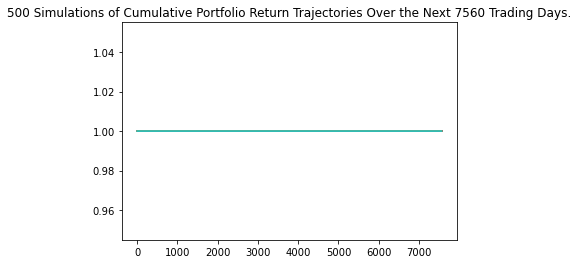

In [23]:
# Visualize simulation
MC_thirty_year.plot_simulation()

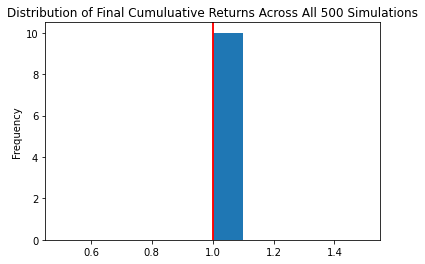

In [24]:
# Visualize probability distribution
MC_thirty_year.plot_distribution()

In [25]:
# Statistical summary for Monte Carlo simulation results
MC_thirty_summary_statistics = MC_thirty_year.summarize_cumulative_return()
print(MC_thirty_summary_statistics)

count           500.0
mean              1.0
std               0.0
min               1.0
25%               1.0
50%               1.0
75%               1.0
max               1.0
95% CI Lower      1.0
95% CI Upper      1.0
Name: 7560, dtype: float64


### Analyzing Retirement Portfolio Forecasts

In [35]:
print(f"The current value of the stock and bond portion of the portfolio is ${total_stocks_bonds: 0.2f}")

# Lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = round(MC_thirty_summary_statistics[8] * total_stocks_bonds,2)
ci_upper_thirty_cumulative_return = round(MC_thirty_summary_statistics[9] * total_stocks_bonds,2)

print(f"Given the current value of the stock & bond portion of the portfolio at ${total_stocks_bonds},"
      f" the cumulative return over the next 30 years is forecast to end within in the range of"
      f" ${ci_lower_thirty_cumulative_return} and ${ci_upper_thirty_cumulative_return}.")

The current value of the stock and bond portion of the portfolio is $ 60688.70
Given the current value of the stock & bond portion of the portfolio at $60688.7, the cumulative return over the next 30 years is forecast to end within in the range of $60688.7 and $60688.7.


### Forecast Cumulative Returns in 10 Years


In [28]:
MC_ten_year = MCSimulation(
    portfolio_data = portfolio_prices_ten_df,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

MC_ten_year.portfolio_data.head()

AGG                                                  \
              open    high       low    close   volume trade_count   
2017-08-07  109.69  109.72  109.6066  109.685  2359826        7755   
2017-08-08  109.67  109.69  109.5000  109.580  2570876       12663   
2017-08-09  109.87  109.87  109.6600  109.670  2308932       11031   
2017-08-10  109.70  109.85  109.6700  109.800  2004163       12437   
2017-08-11  109.75  109.94  109.6800  109.870  1913253       10113   

                                        SPY                            \
                  vwap daily_return    open    high     low     close   
2017-08-07  109.674876          NaN  247.49  247.87  247.37  247.8400   
2017-08-08  109.577636    -0.000957  247.51  248.91  246.83  247.2700   
2017-08-09  109.771749     0.000821  246.47  247.31  246.06  247.2700   
2017-08-10  109.776611     0.001185  246.29  246.44  243.70  243.7599   
2017-08-11  109.860974     0.000638  244.02  244.80  243.75  244.1100   

                                                              
                 volume trade_count        vwap daily_return  
2017-08-07   31995021.0    100111.0  247.668698          NaN  
2017-08-08   61719353.0    192921.0  247.739709    -0.002300  
2017-08-09   62632619.0    223650.0  246.791421     0.000000  
2017-08-10  120418270.0    424321.0  245.027847    -0.014195  
2017-08-11   74869947.0    278786.0  244.222867     0.001436

In [29]:
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2517,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2518,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2519,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


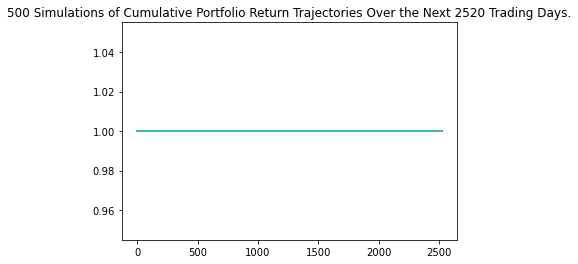

In [30]:
MC_ten_year.plot_simulation()

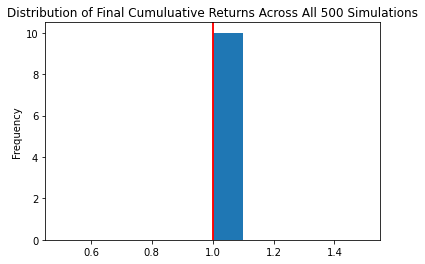

In [31]:
MC_ten_year.plot_distribution()

In [32]:
MC_ten_summary_statistics = MC_ten_year.summarize_cumulative_return()
print(MC_ten_summary_statistics)

count           500.0
mean              1.0
std               0.0
min               1.0
25%               1.0
50%               1.0
75%               1.0
max               1.0
95% CI Lower      1.0
95% CI Upper      1.0
Name: 2520, dtype: float64


In [33]:
print(f"The current value of the stock and bond portion of the portfolio is ${total_stocks_bonds: 0.2f}")

ci_lower_ten_cumulative_return = round(MC_ten_summary_statistics[8] * total_stocks_bonds,2)
ci_upper_ten_cumulative_return = round(MC_ten_summary_statistics[9] * total_stocks_bonds,2)

print(f"Given the current value of the stock & bond portion of the portfolio at ${total_stocks_bonds},"
      f" the cumulative return over the next 10 years is forecast to end within in the range of"
      f" ${ci_lower_ten_cumulative_return} and ${ci_upper_ten_cumulative_return}.")

The current value of the stock and bond portion of the portfolio is $ 60688.70
